In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
pi = np.pi
%matplotlib inline


Initiialise data and calculate $\omega$ using $\omega=\frac{2\pi c}{n\lambda}$

In [4]:
ref_index = pd.DataFrame({"wavelength": np.array([486, 589, 656])*1e-9, "n": [1.95869, 1.92663, 1.91457]})
ref_index["omega"] = 2*pi*3e8/(ref_index["n"]*ref_index["wavelength"])
ref_index["n_squared"] = ref_index["n"]**2
ref_index

,wavelength,n,omega,n_squared
0,4.860000e-07,1.95869,1.980155e+15,3.836467
1,5.890000e-07,1.92663,1.661068e+15,3.711903
2,6.560000e-07,1.91457,1.500811e+15,3.665578


Calculate values for $a=\frac{Ne^2}{\varepsilon_0 m}$ and $\omega_0$

We expect $\omega_0$ to be in the UV range, so we use a starting value of $1\times10^{16}$, corresponding to a wavelength of roughly 100nm.

For the constant $a$, we use $N=1\times10^{29}$ to initialise it (see https://en.wikipedia.org/wiki/Number_density#Examples)

In [37]:
def fit_func(omega, a, omega_0):
    return 1+a/(omega_0**2-omega**2)
#guess of N=100*10^27
expected_a = 1e30*(1.6e-19)**2/(8.854e-12*9.11e-31)
expected_omega_0 = 1e16
p0 = [expected_a, expected_omega_0]
params, pcov = curve_fit(fit_func, ref_index["omega"], ref_index["n_squared"], p0)
params # a, omega_0

array([7.33678940e+31, 5.45823031e+15])

In [38]:
np.sqrt(pcov.diagonal())

array([1.54148466e+30, 5.14833558e+13])

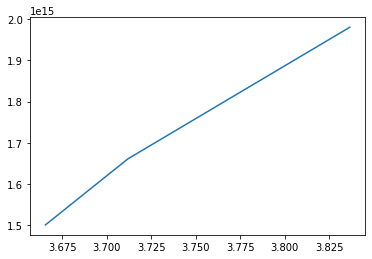

In [17]:
# plt.plot(ref_index["n_squared"], fit_func(ref_index["omega"], *params))
plt.plot(ref_index["n_squared"], ref_index["omega"])
plt.show()

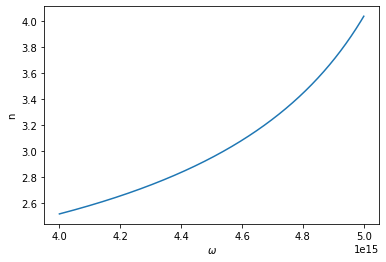

In [35]:
x_vals = np.linspace(4e15,5e15,10000)
plt.plot(x_vals, np.sqrt(1+ params[0]/(params[1]**2-x_vals**2)))
plt.xlabel("$\omega$")
plt.ylabel("n")
plt.savefig("eq10")
plt.show()

In [ ]:
def verdet(omega):
    